## [H重點]
使用 Sklearn 中的 Lasso, Ridge 模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義。

機器學習的模型非常多種，但要訓練的資料多半有固定的格式，確保你了解訓練資料的格式為何，這樣在應用新模型時，就能夠最快的上手開始訓練！

## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則話來觀察訓練情形。

In [1]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
boston_housing = datasets.load_boston()

X_train, X_test, y_train, y_test = train_test_split(boston_housing.data, boston_housing.target, test_size=0.33, random_state=42)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(X_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(X_test)

In [5]:
print(regr.coef_)
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

[-1.28749718e-01  3.78232228e-02  5.82109233e-02  3.23866812e+00
 -1.61698120e+01  3.90205116e+00 -1.28507825e-02 -1.42222430e+00
  2.34853915e-01 -8.21331947e-03 -9.28722459e-01  1.17695921e-02
 -5.47566338e-01]
Mean squared error: 20.72


## LASSO

In [16]:
boston_housing = datasets.load_boston()

X_train, X_test, y_train, y_test = train_test_split(boston_housing.data, boston_housing.target, test_size=0.33, random_state=42)

# 建立一個線性回歸模型
lasso_regr = linear_model.Lasso(alpha = 0.1)
lasso_regr.fit(X_train,y_train)
y_pred = lasso_regr.predict(X_test)

print(lasso_regr.coef_)
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))


[-0.11574403  0.04010153 -0.          1.62617958 -0.          3.73197757
 -0.02209326 -1.13663861  0.20775405 -0.01016164 -0.75142609  0.01243649
 -0.60785656]
Mean squared error: 22.00


In [22]:
# try alpha from 0.01 to 10
alpha_settings = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
mse = []

for alpha in alpha_settings:
    lasso_regr = linear_model.Lasso(alpha = alpha)
    lasso_regr.fit(X_train,y_train)
    y_pred = lasso_regr.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))


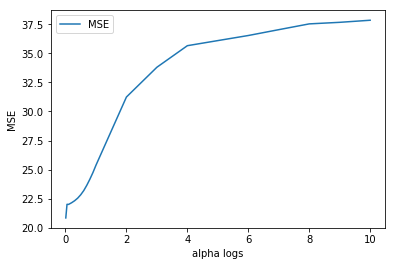

In [26]:
import matplotlib.pyplot as plt

# 將結果繪圖
plt.plot((np.array(alpha_settings)),
         mse, label="MSE")

plt.ylabel("MSE")
plt.xlabel("alpha logs")
plt.legend()


## Ridge

In [21]:
boston_housing = datasets.load_boston()

X_train, X_test, y_train, y_test = train_test_split(boston_housing.data, boston_housing.target, test_size=0.33, random_state=42)

# 建立一個線性回歸模型
ridge_regr = linear_model.Ridge(alpha = 0.1)
ridge_regr.fit(X_train,y_train)
y_pred = ridge_regr.predict(X_test)

print(ridge_regr.coef_)
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

[-1.27596437e-01  3.79911711e-02  5.18429889e-02  3.20983515e+00
 -1.46911806e+01  3.90614294e+00 -1.41161857e-02 -1.40022828e+00
  2.31396085e-01 -8.34450270e-03 -9.12033887e-01  1.18108114e-02
 -5.50825528e-01]
Mean squared error: 20.77


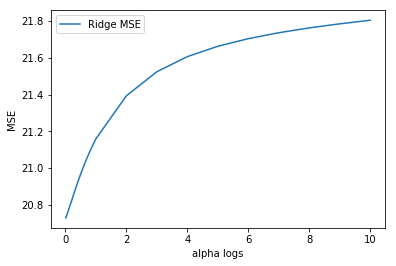

In [27]:
ridge_mse= []

for alpha in alpha_settings:
    ridge_regr = linear_model.Ridge(alpha = alpha)
    ridge_regr.fit(X_train,y_train)
    y_pred = ridge_regr.predict(X_test)
    ridge_mse.append(mean_squared_error(y_test, y_pred))
    

# 將結果繪圖
plt.plot((np.array(alpha_settings)),
         ridge_mse, label="Ridge MSE")

plt.ylabel("MSE")
plt.xlabel("alpha logs")
plt.legend()